# EDA

In [1]:
from function import *

In [2]:
# load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

---

### 1. Overall information

In [3]:
# check shape
print('train shape :', train.shape) # 12 - 16 season
print('test shape :', test.shape) # 17 season

train shape : (1458644, 11)
test shape : (625134, 9)


In [4]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
# Unique
print('train unique 갯수')
for i in range(11):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
id : 1458644개
vendor_id : 2개
pickup_datetime : 1380222개
dropoff_datetime : 1380377개
passenger_count : 10개
pickup_longitude : 23047개
pickup_latitude : 45245개
dropoff_longitude : 33821개
dropoff_latitude : 62519개
store_and_fwd_flag : 2개
trip_duration : 7417개


---

### 2. Y data

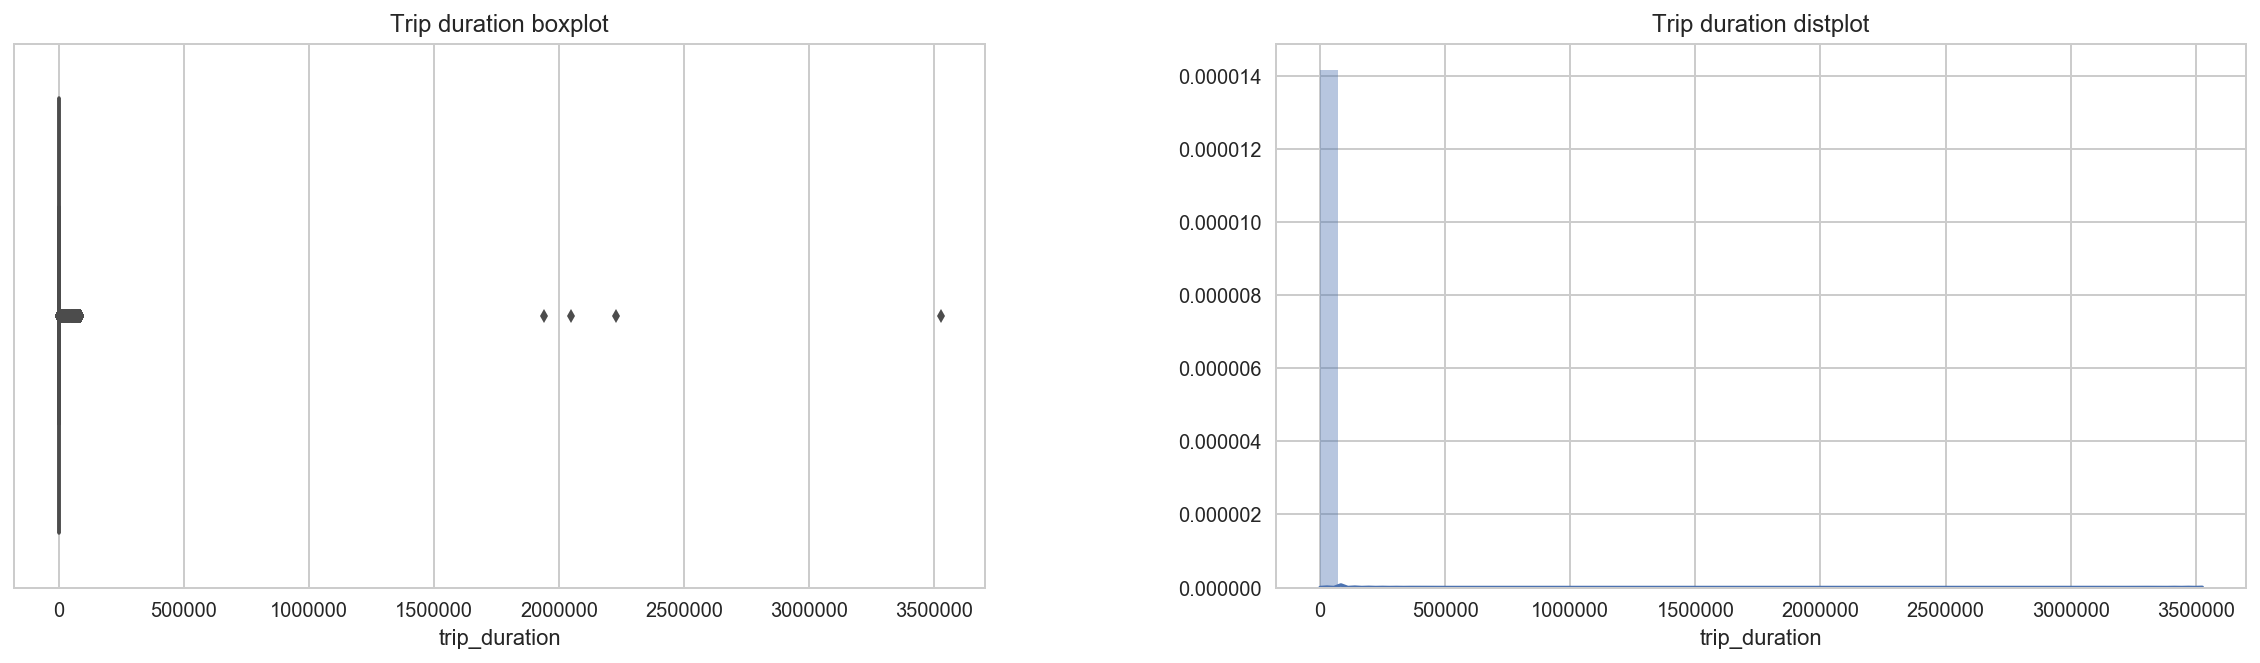

In [6]:
# trip duration
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

# boxplot
plt.subplot(121)
sns.boxplot(x = 'trip_duration', data = train)
plt.title('Trip duration boxplot')

# distplot
plt.subplot(122)
sns.distplot(train['trip_duration'].values, axlabel = 'trip_duration')
plt.title('Trip duration distplot')

plt.show()

#### Note :

1. 이상치가 너무 커서 데이터를 파악하기 힘듦 (outlier 제거)
2. 분포 시각화에 대한 필요성 (log)

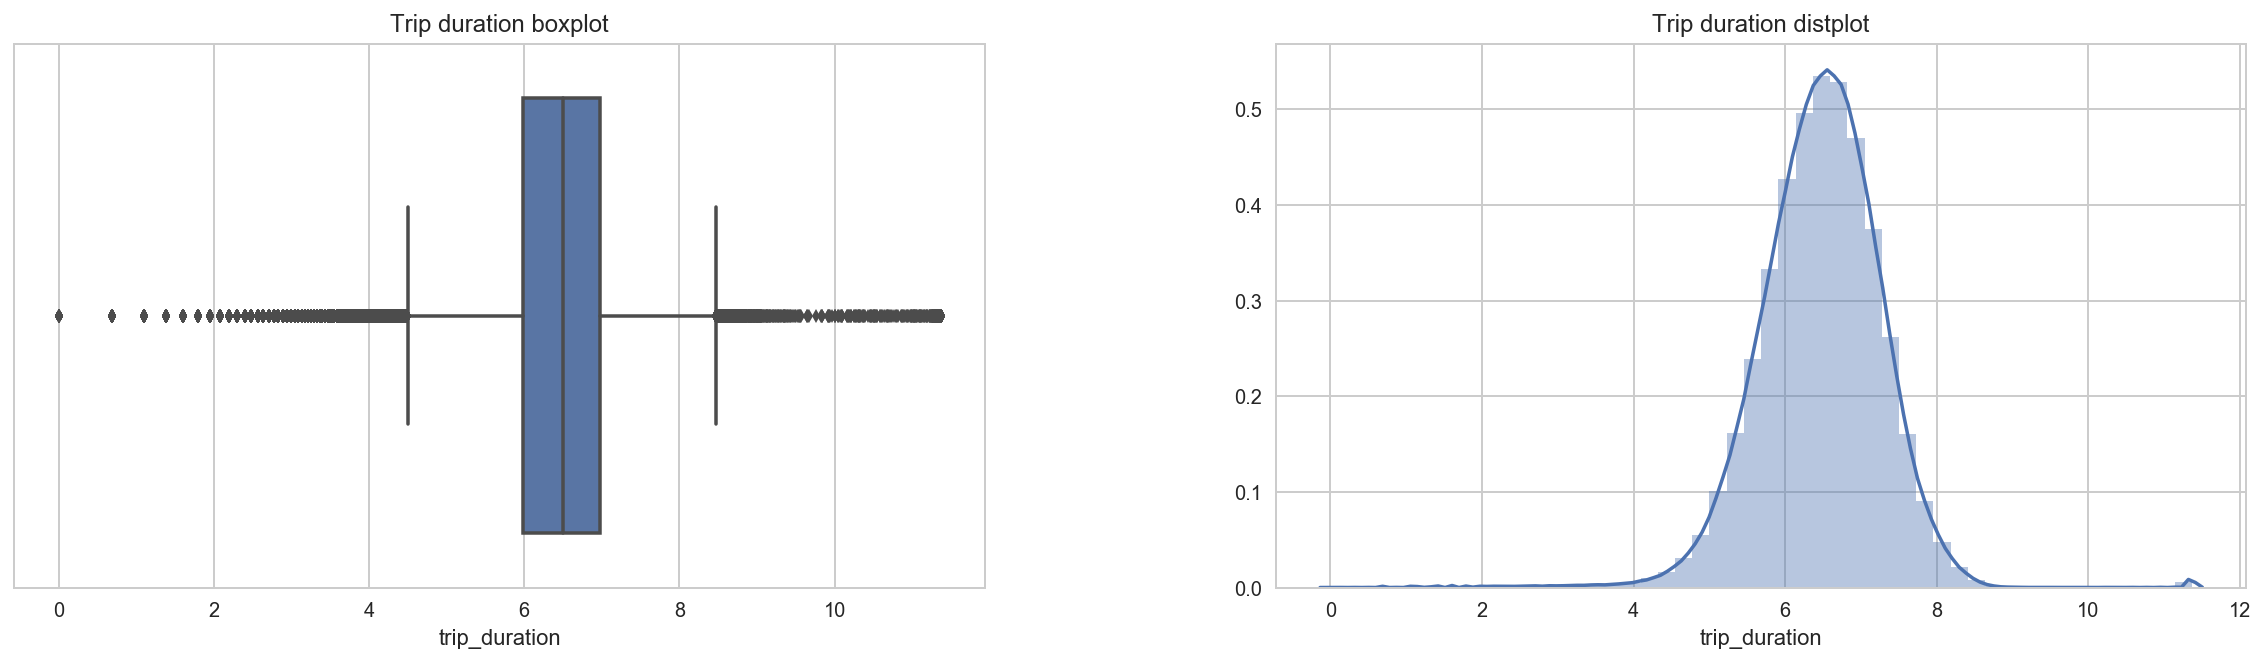

In [7]:
# 약간의 preprocessing
train = train[train['trip_duration'] < 1500000].reset_index(drop=True) # 4개 outlier 제거
train['trip_duration'] = np.log(train['trip_duration'])

# trip duration
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

# boxplot
plt.subplot(121)
sns.boxplot(x = 'trip_duration', data = train)
plt.title('Trip duration boxplot')

# distplot
plt.subplot(122)
sns.distplot(train['trip_duration'].values, axlabel = 'trip_duration')
plt.title('Trip duration distplot')

plt.show()

---

### 3. Y data & X data

In [8]:
# EDA를 편하게 하기 위해 type별 정렬
category = ['vendor_id', 'passenger_count', 'store_and_fwd_flag',]
continuous = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
date = ['pickup_datetime', 'dropoff_datetime']
y_train = ['trip_duration']

# train data
train = pd.concat([train[category], train[continuous], train[date], train[y_train]], axis = 1)
train.tail()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_datetime,dropoff_datetime,trip_duration
1458635,2,4,N,-73.982201,40.745522,-73.994911,40.740170,2016-04-08 13:31:04,2016-04-08 13:44:02,6.656727
1458636,1,1,N,-74.000946,40.747379,-73.970184,40.796547,2016-01-10 07:35:15,2016-01-10 07:46:10,6.484635
1458637,2,1,N,-73.959129,40.768799,-74.004433,40.707371,2016-04-22 06:57:41,2016-04-22 07:10:25,6.638568
1458638,1,1,N,-73.982079,40.749062,-73.974632,40.757107,2016-01-05 15:56:26,2016-01-05 16:02:39,5.921578
1458639,1,1,N,-73.979538,40.781750,-73.972809,40.790585,2016-04-05 14:44:25,2016-04-05 14:47:43,5.288267


#### 3.1 Category

In [9]:
# store_and_fwd_flag Preprocessing
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

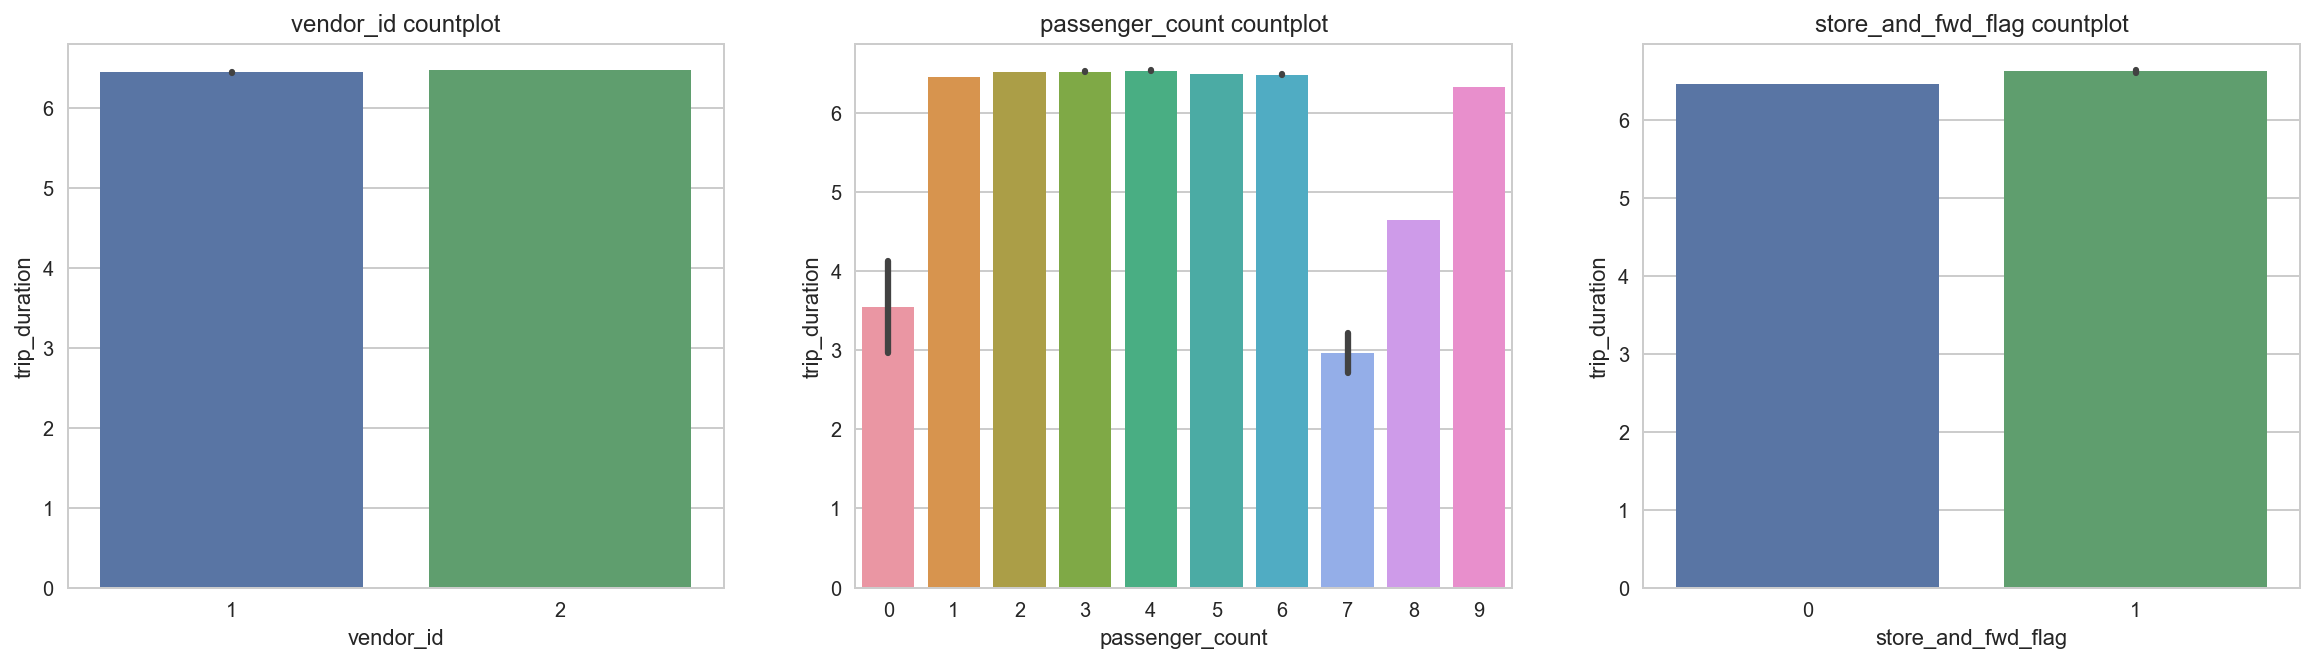

In [10]:
# feature countplot
plt.figure(figsize=(20, 5))
subplots_adjust(hspace = 0.3)

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.barplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} countplot'.format(train.columns[i]))

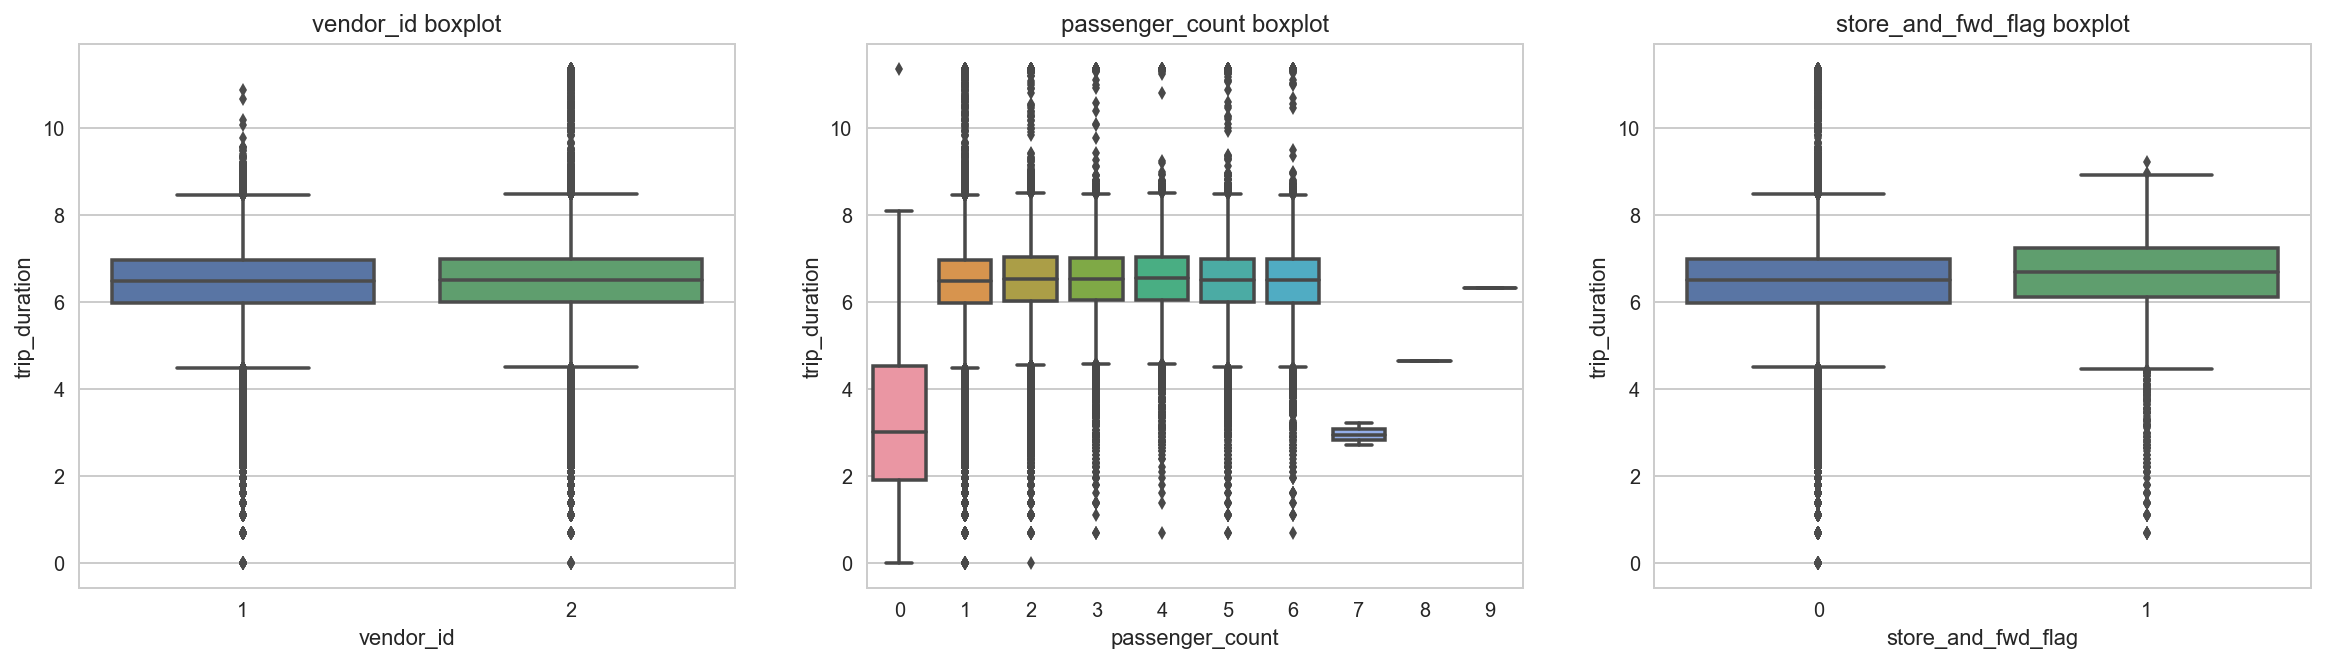

In [11]:
# feature boxplot
plt.figure(figsize=(20, 5))
subplots_adjust(hspace = 0.3)

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} boxplot'.format(train.columns[i]))

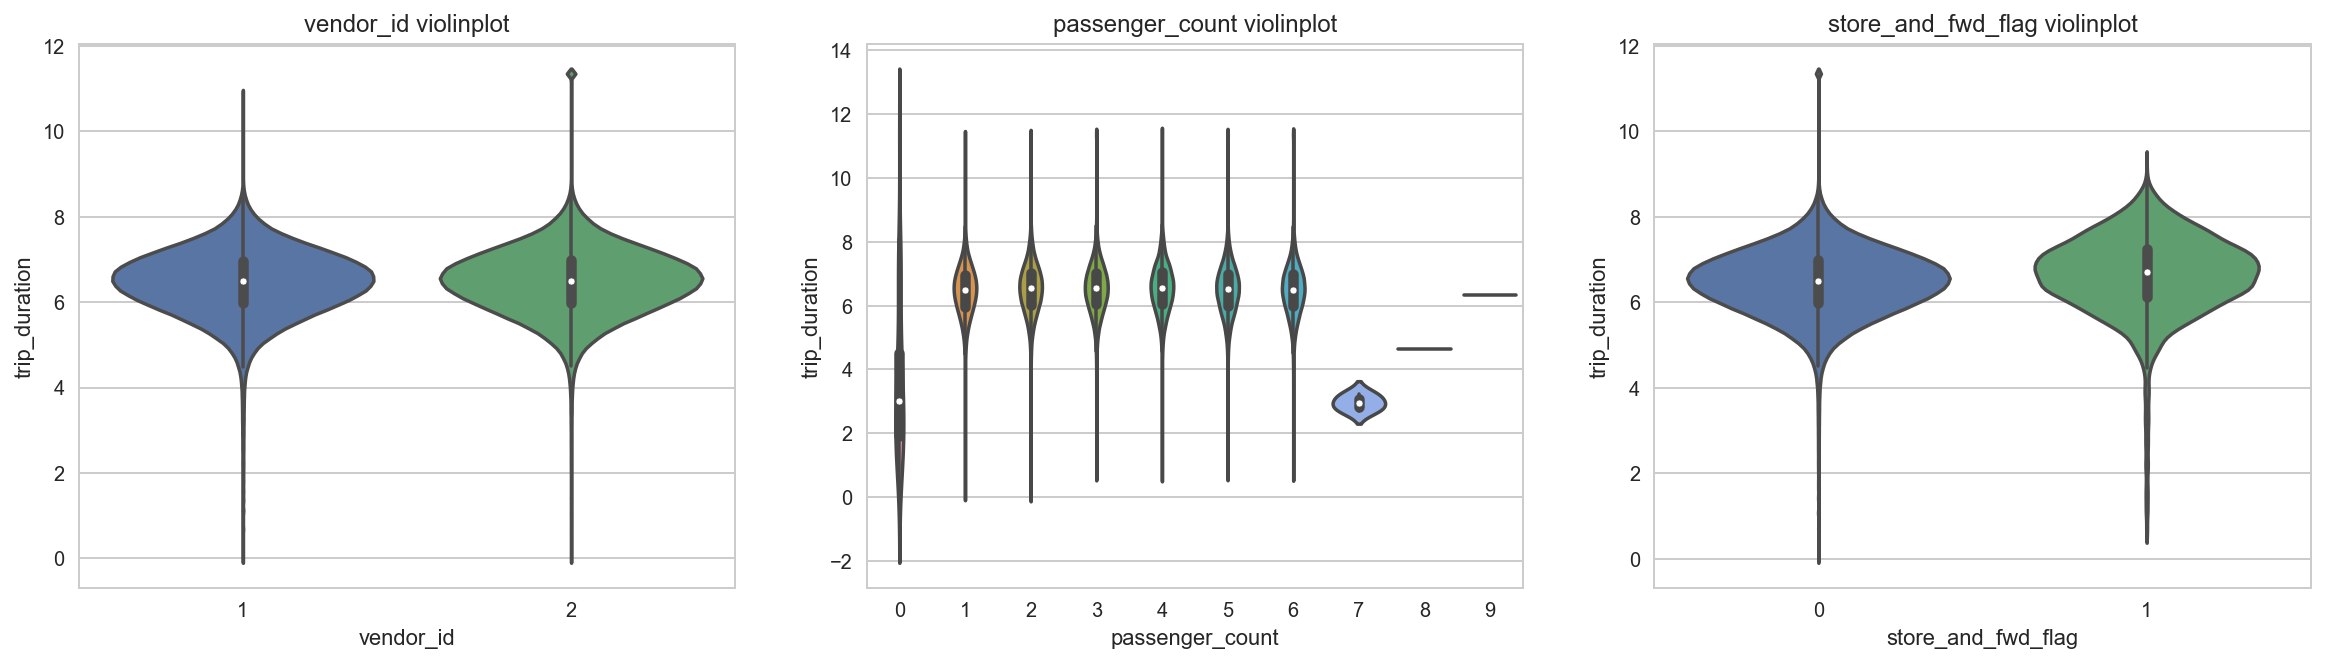

In [12]:
# feature violinplot
plt.figure(figsize=(20, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} violinplot'.format(train.columns[i]))

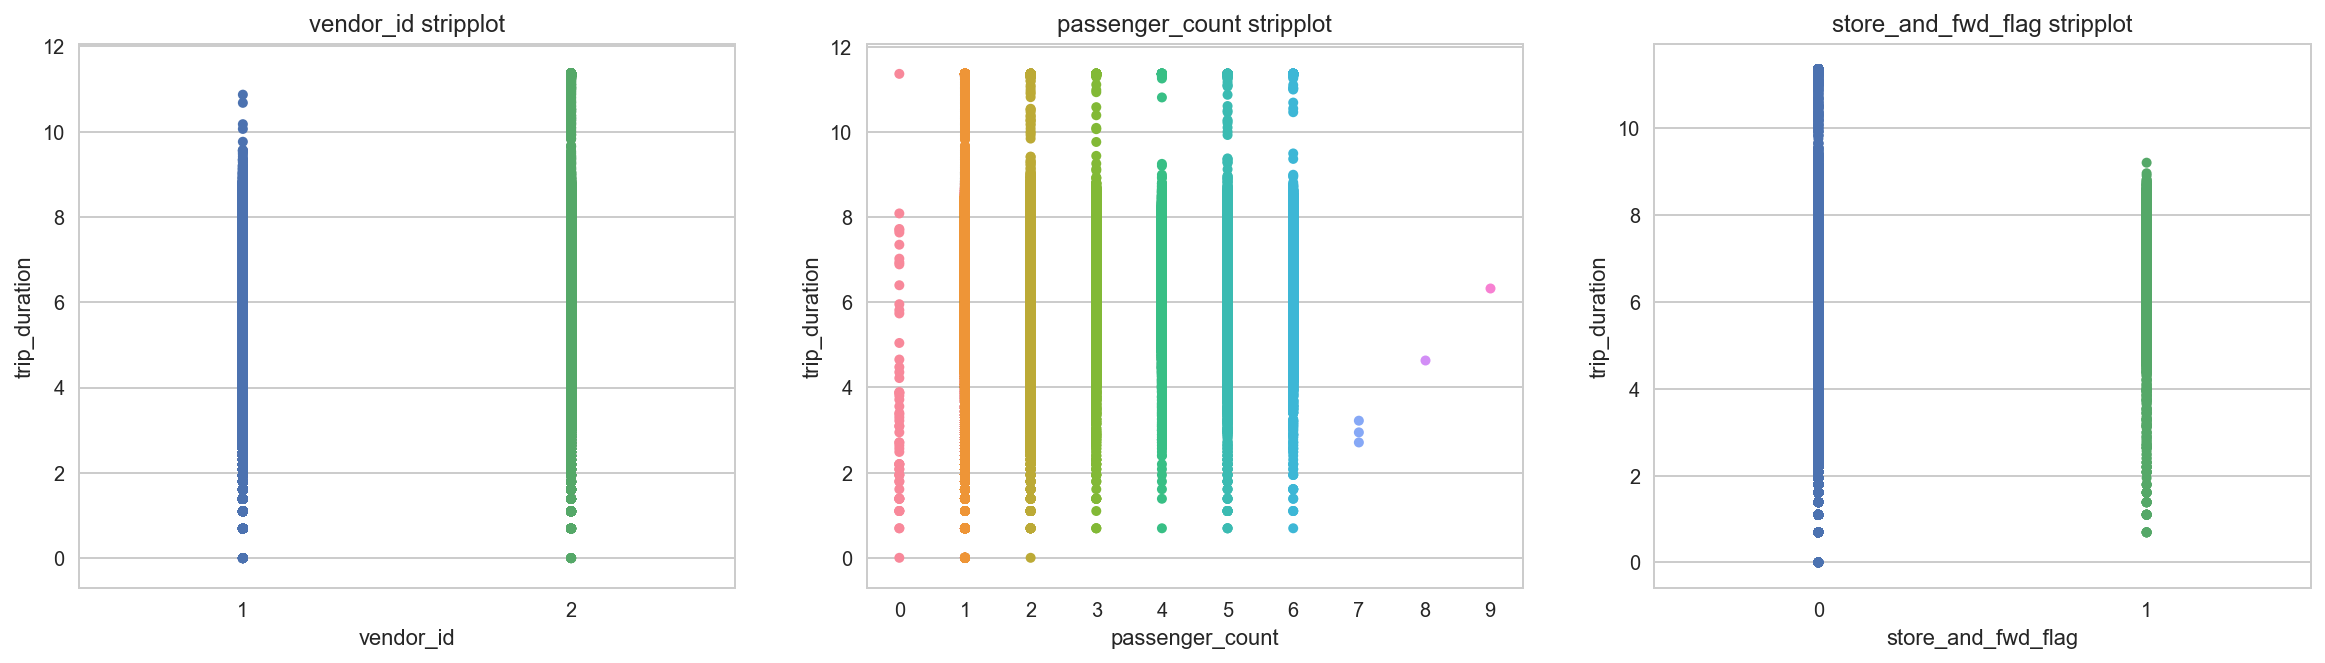

In [13]:
# feature stripplot
plt.figure(figsize=(20, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.stripplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} stripplot'.format(train.columns[i]))

#### 3.2 Continuous

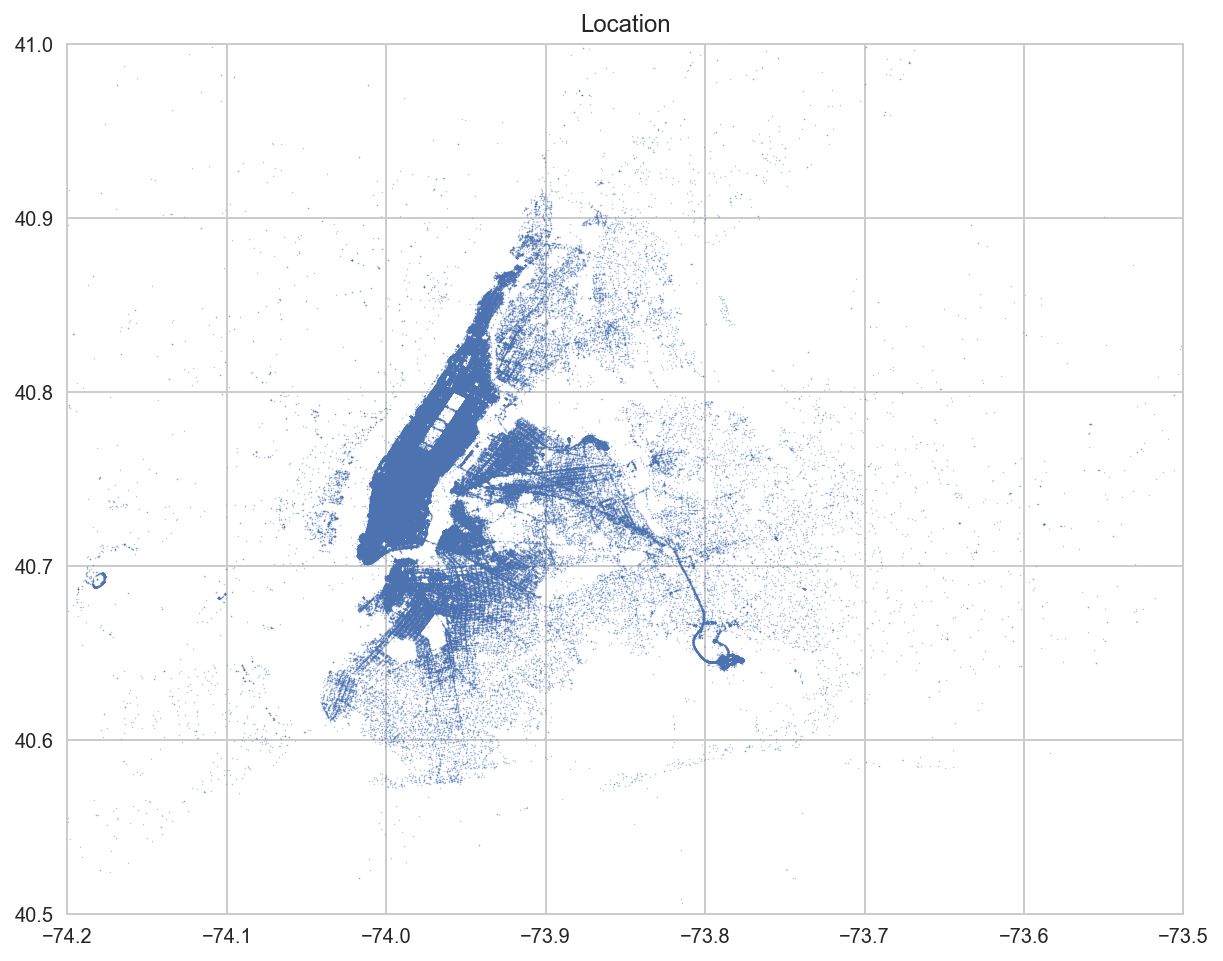

In [14]:
# location
plt.figure(figsize = (10, 8))
longitude = list(train['pickup_longitude']) + list(train['dropoff_longitude'])
latitude = list(train['pickup_latitude']) + list(train['dropoff_latitude'])

plt.title('Location')
plt.xlim(-74.2, -73.5)
plt.ylim(40.5, 41)
plt.plot(longitude, latitude, '.', alpha = 0.4, markersize = 1.5)

plt.show()

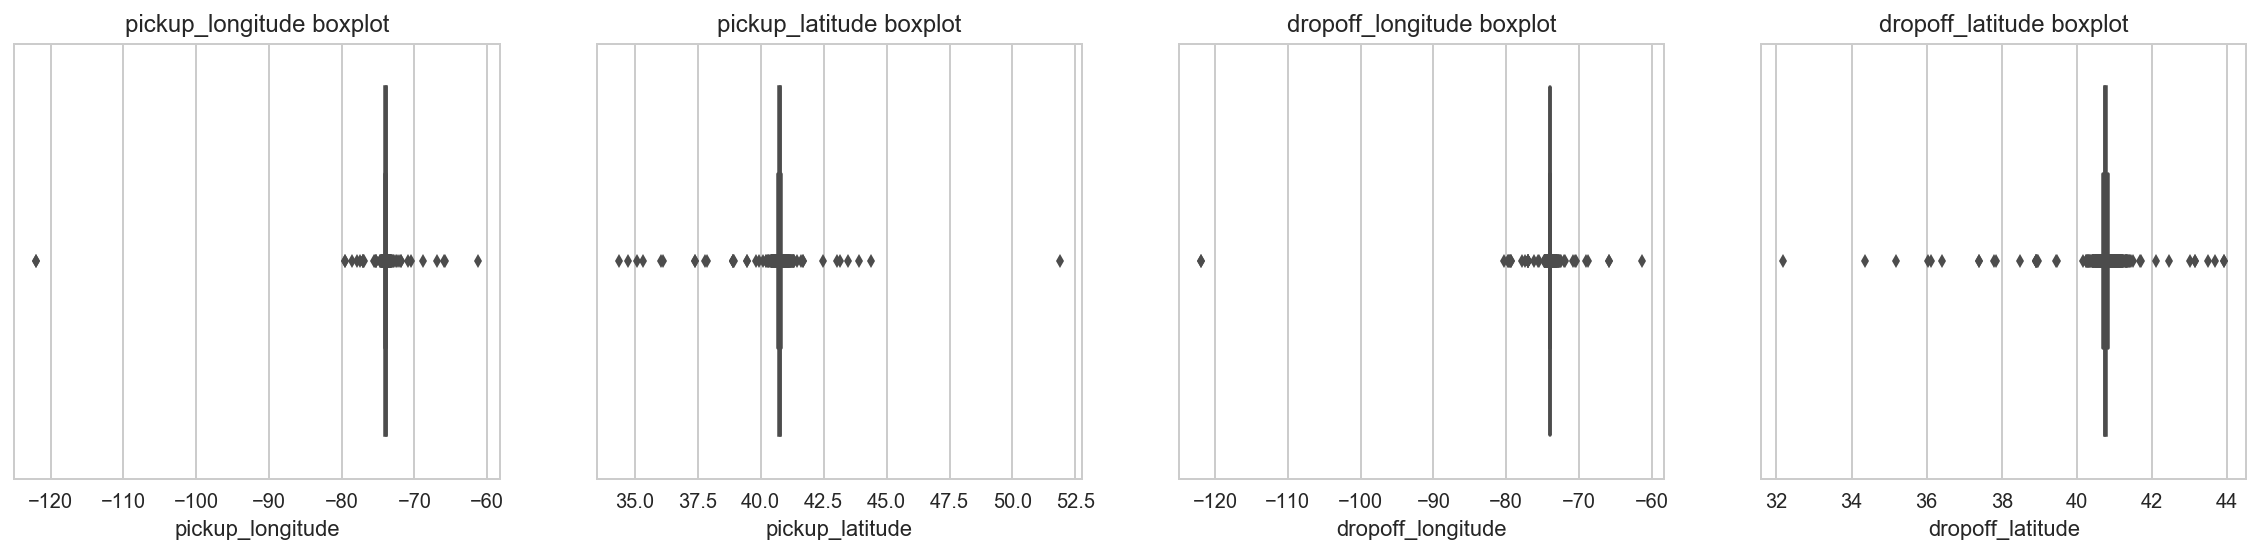

In [15]:
# feature boxplot
plt.figure(figsize=(20, 4))

for i in range(3, 6+1):
    plt.subplot(1, 4, i-2)
    sns.boxplot(x = train[train.columns[i]])
    plt.title('{} boxplot'.format(train.columns[i]))

#### 3.3 Date

In [16]:
# M-W-H 분리 (train data 실행)
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime']) 
train['month'] = train['pickup_datetime'].dt.month 
train['weekday'] = train['pickup_datetime'].dt.weekday # 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
train["hour"] = train['pickup_datetime'].dt.hour
train['holiday'] = train['pickup_datetime'].apply(holiday) # 휴일 (1:휴일, 0:평일)

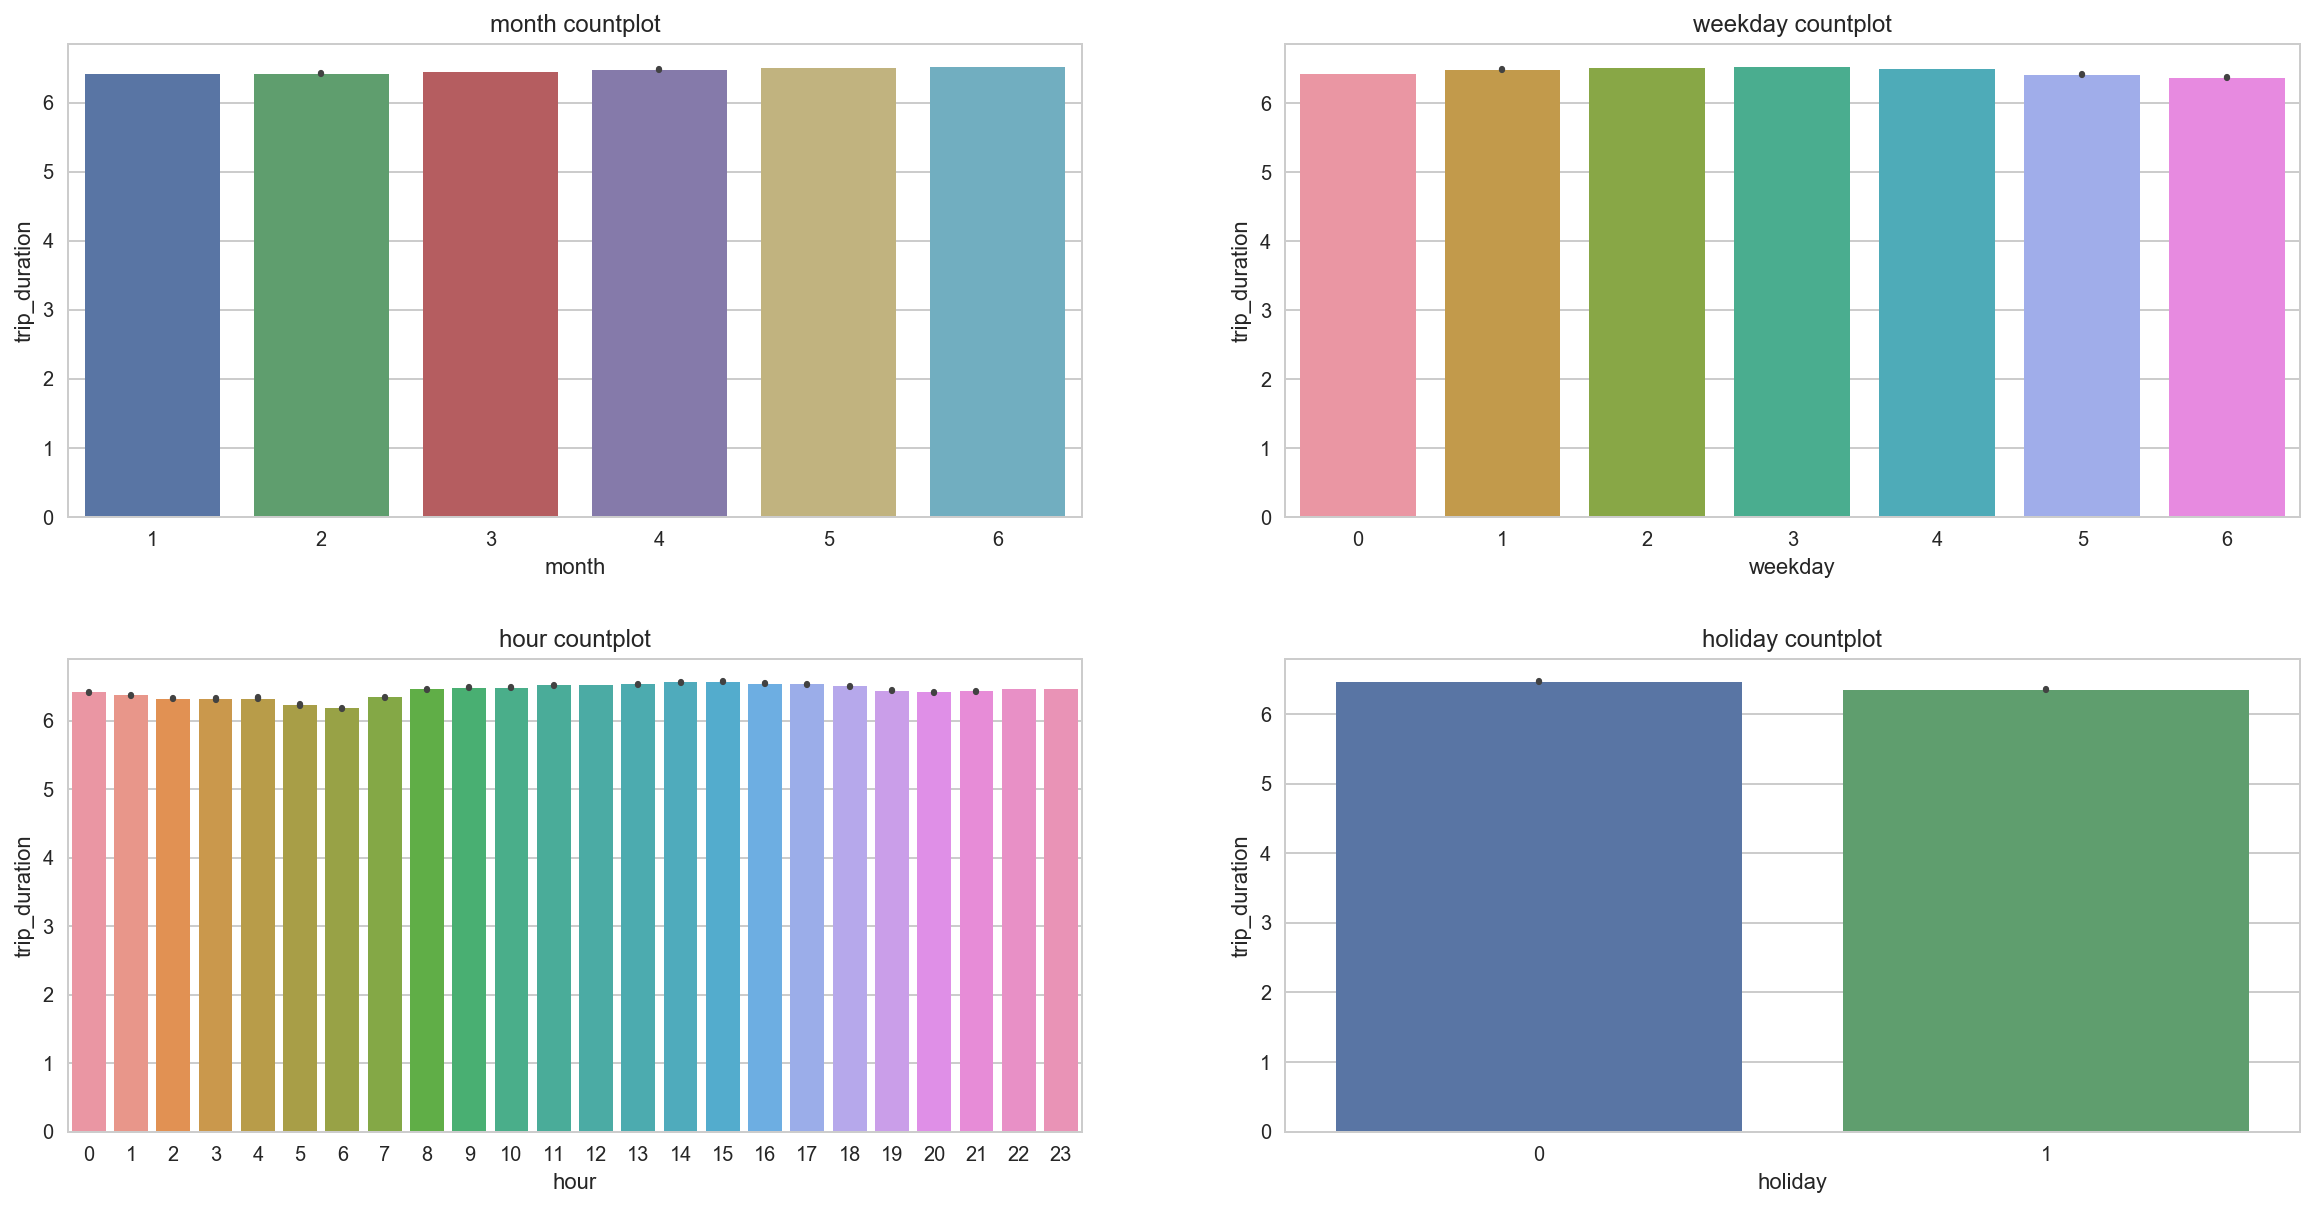

In [17]:
# feature countplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2, 2, i-9)
    sns.barplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} countplot'.format(train.columns[i]))

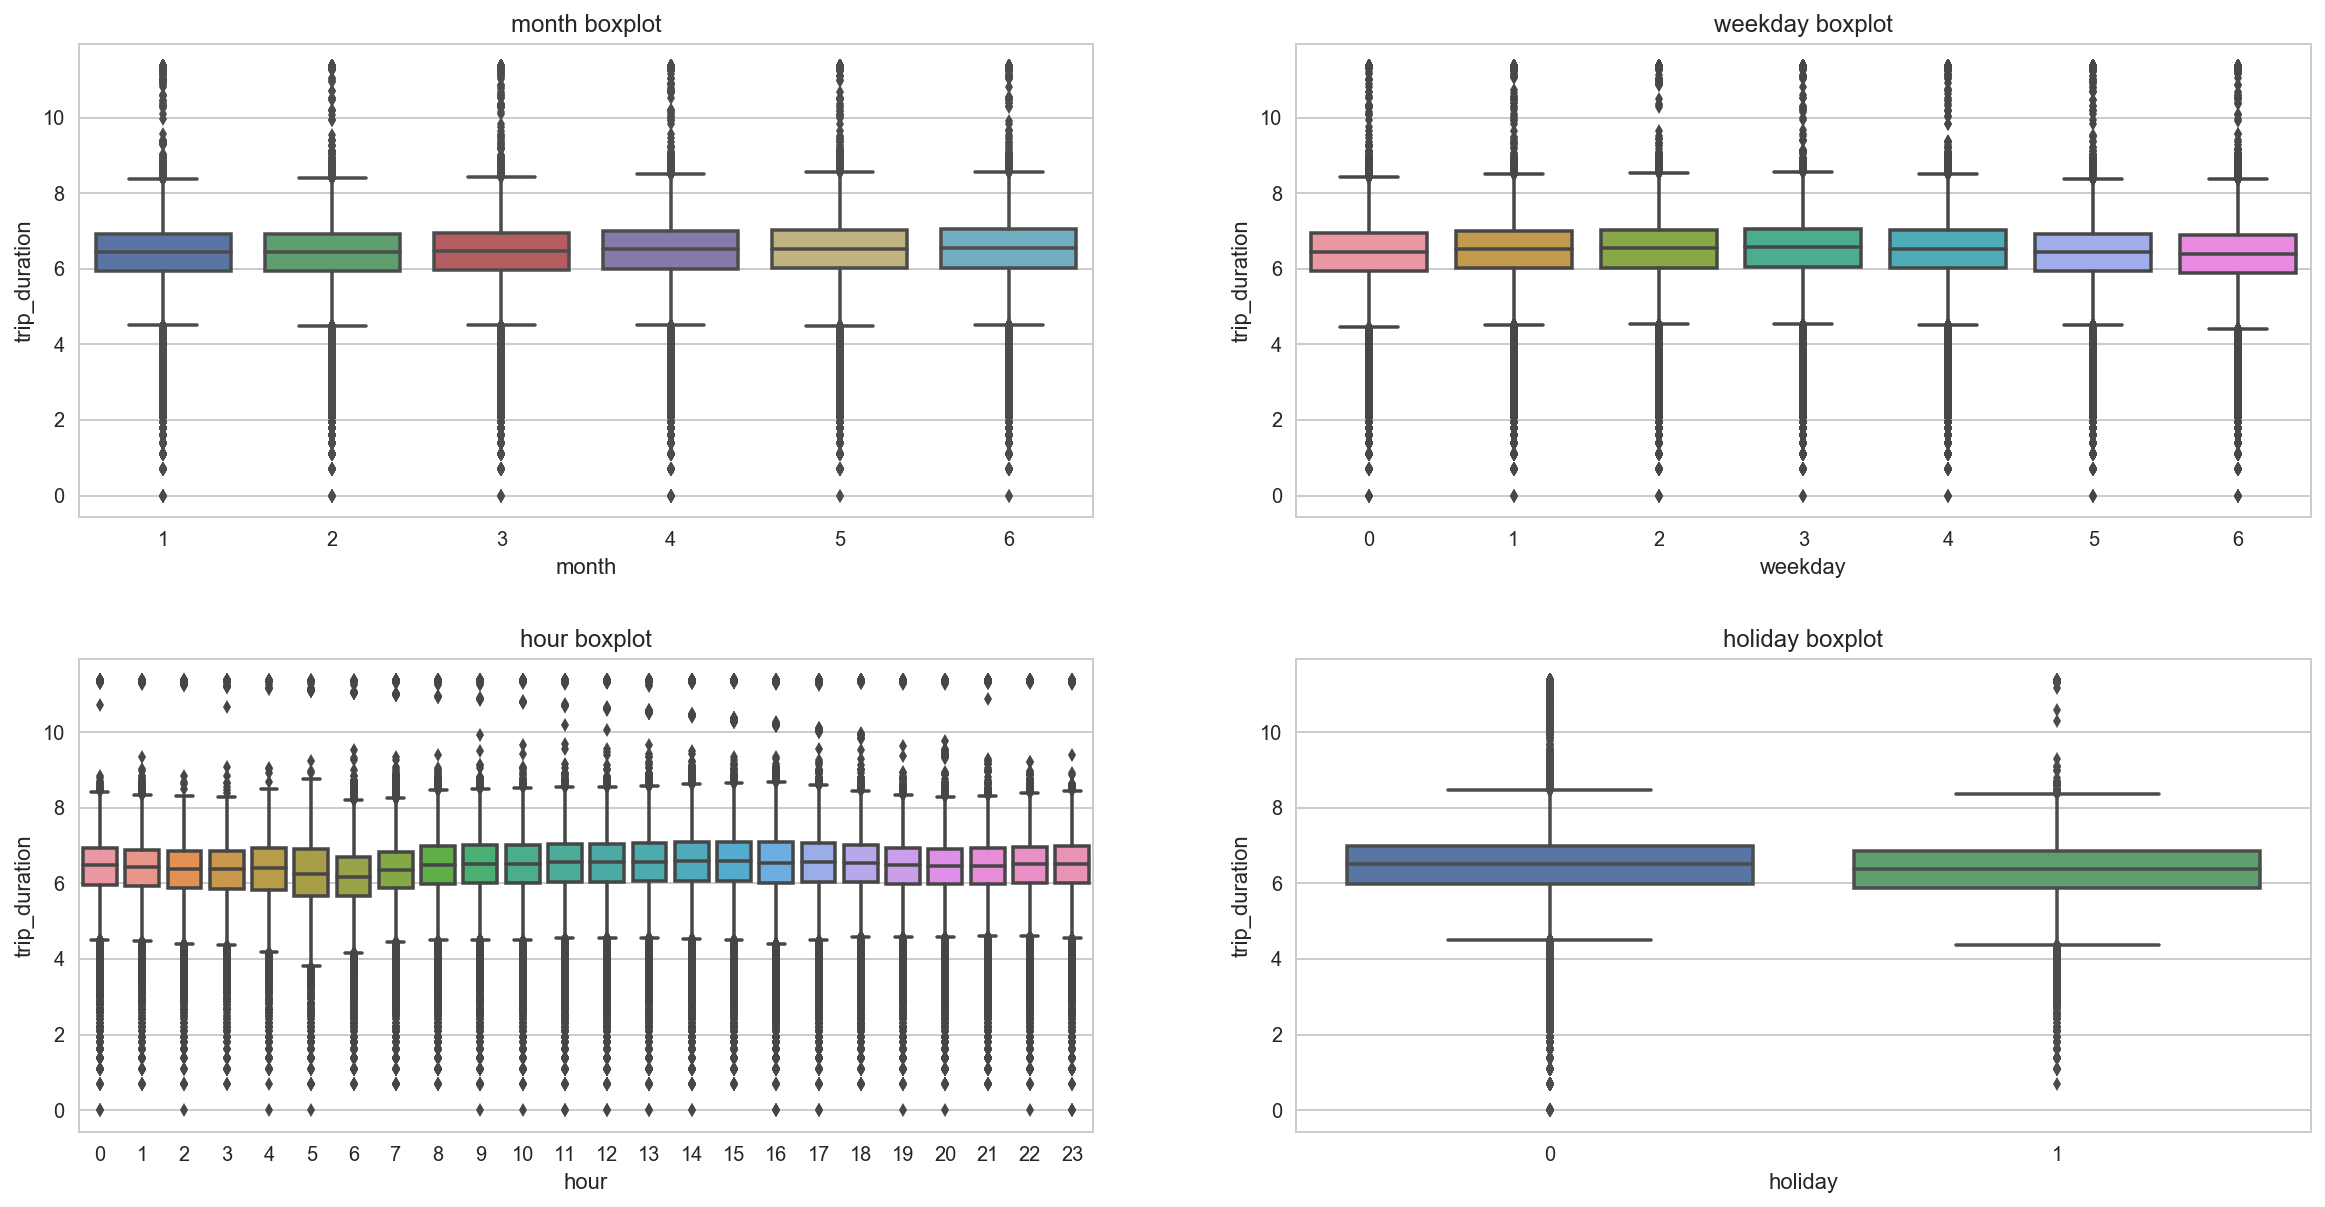

In [18]:
# feature boxplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2, 2, i-9)
    sns.boxplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} boxplot'.format(train.columns[i]))

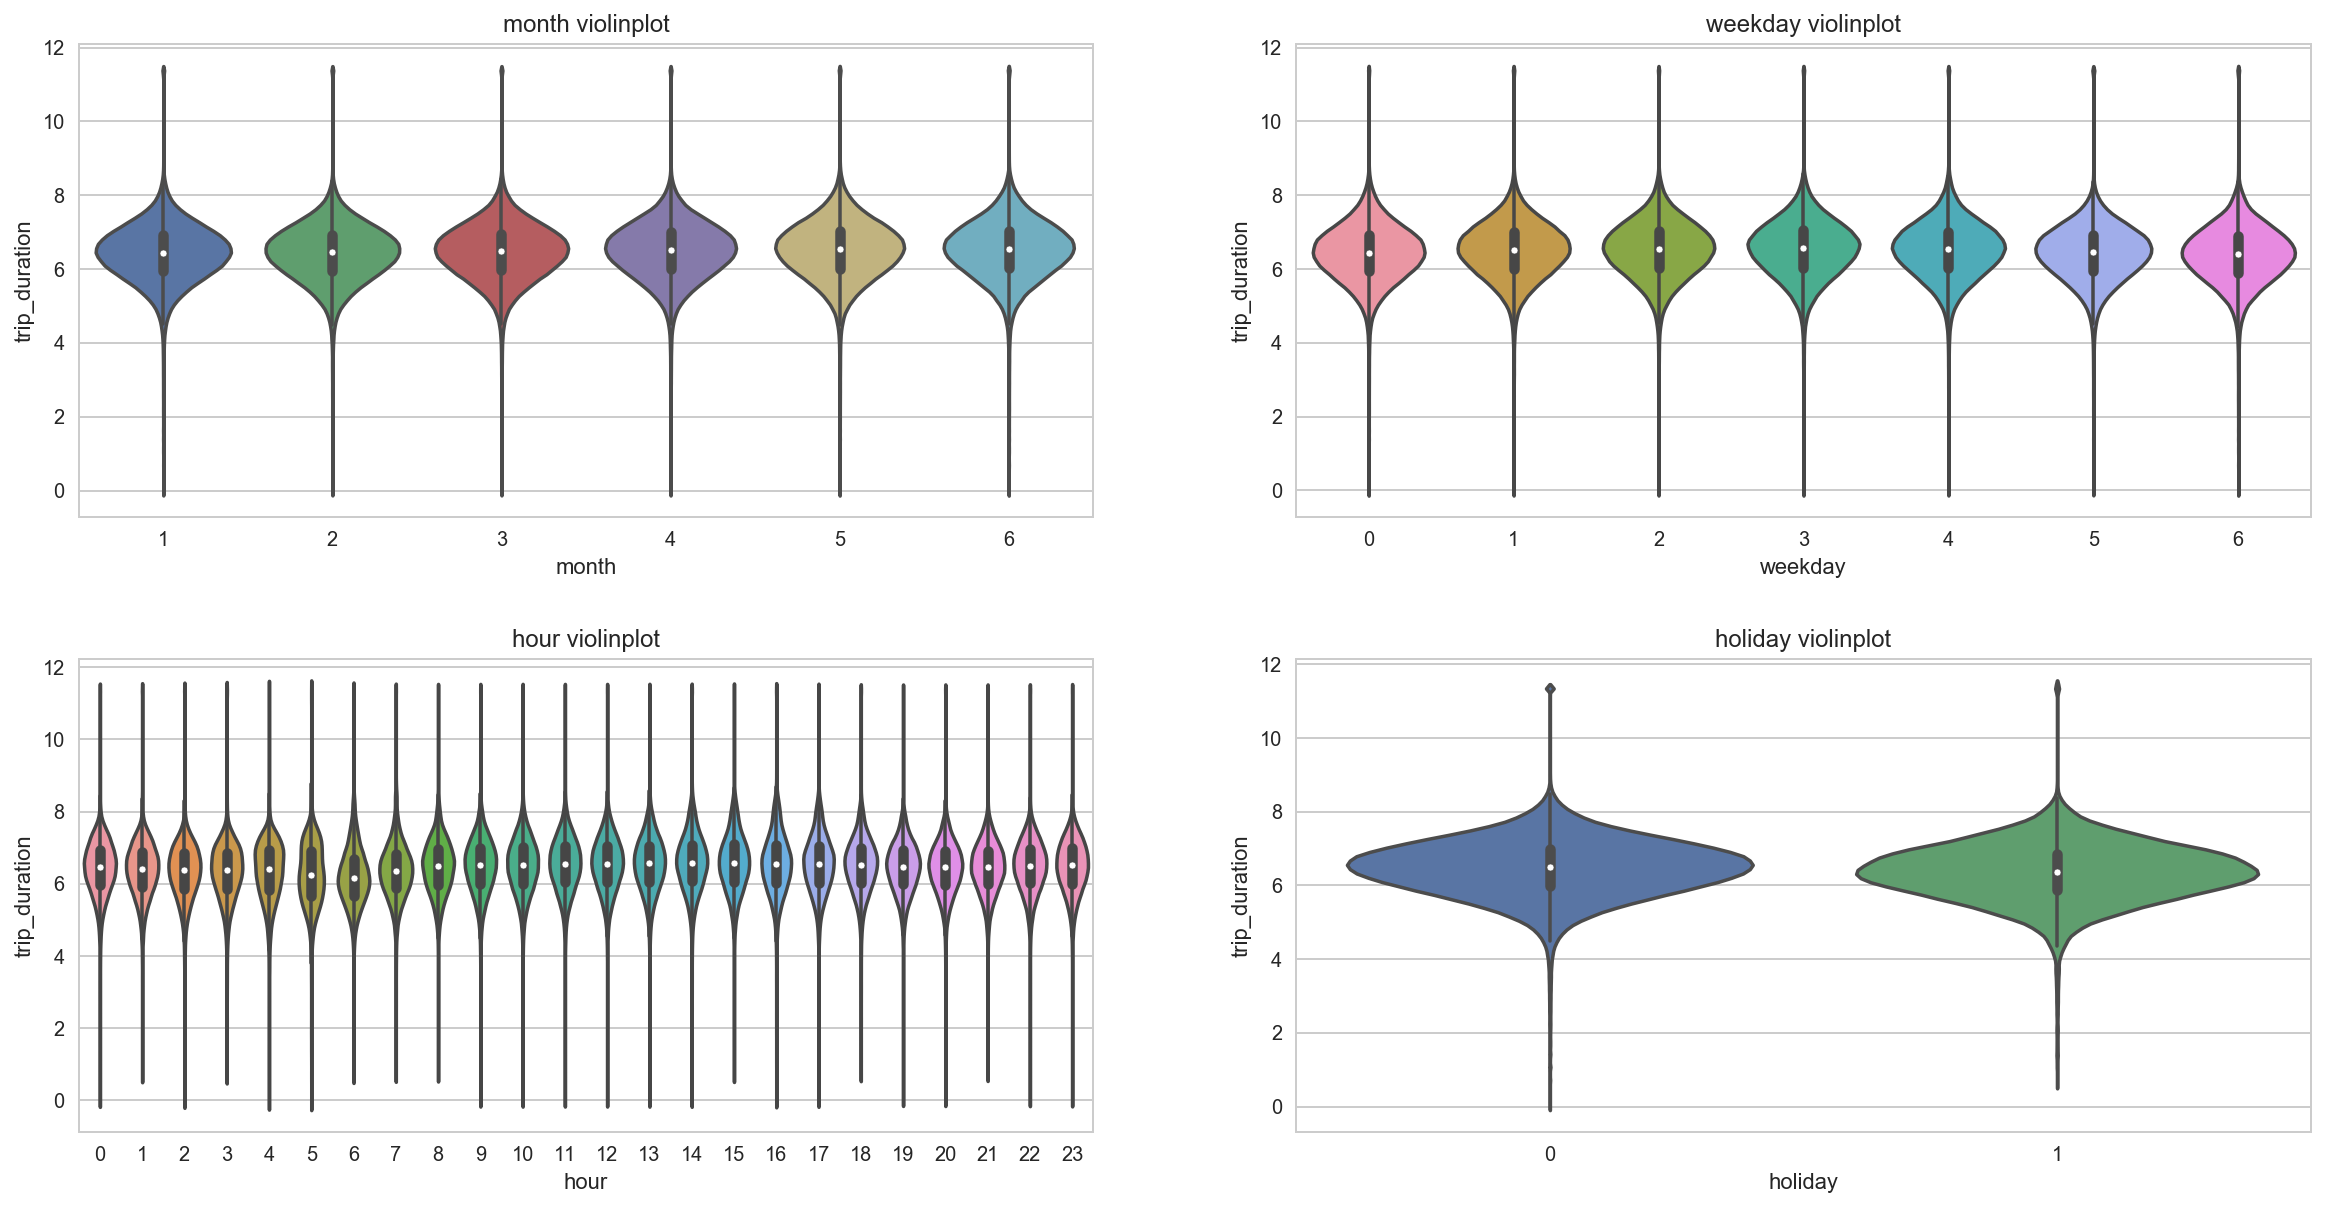

In [19]:
# feature violinplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2, 2, i-9)
    sns.violinplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} violinplot'.format(train.columns[i]))

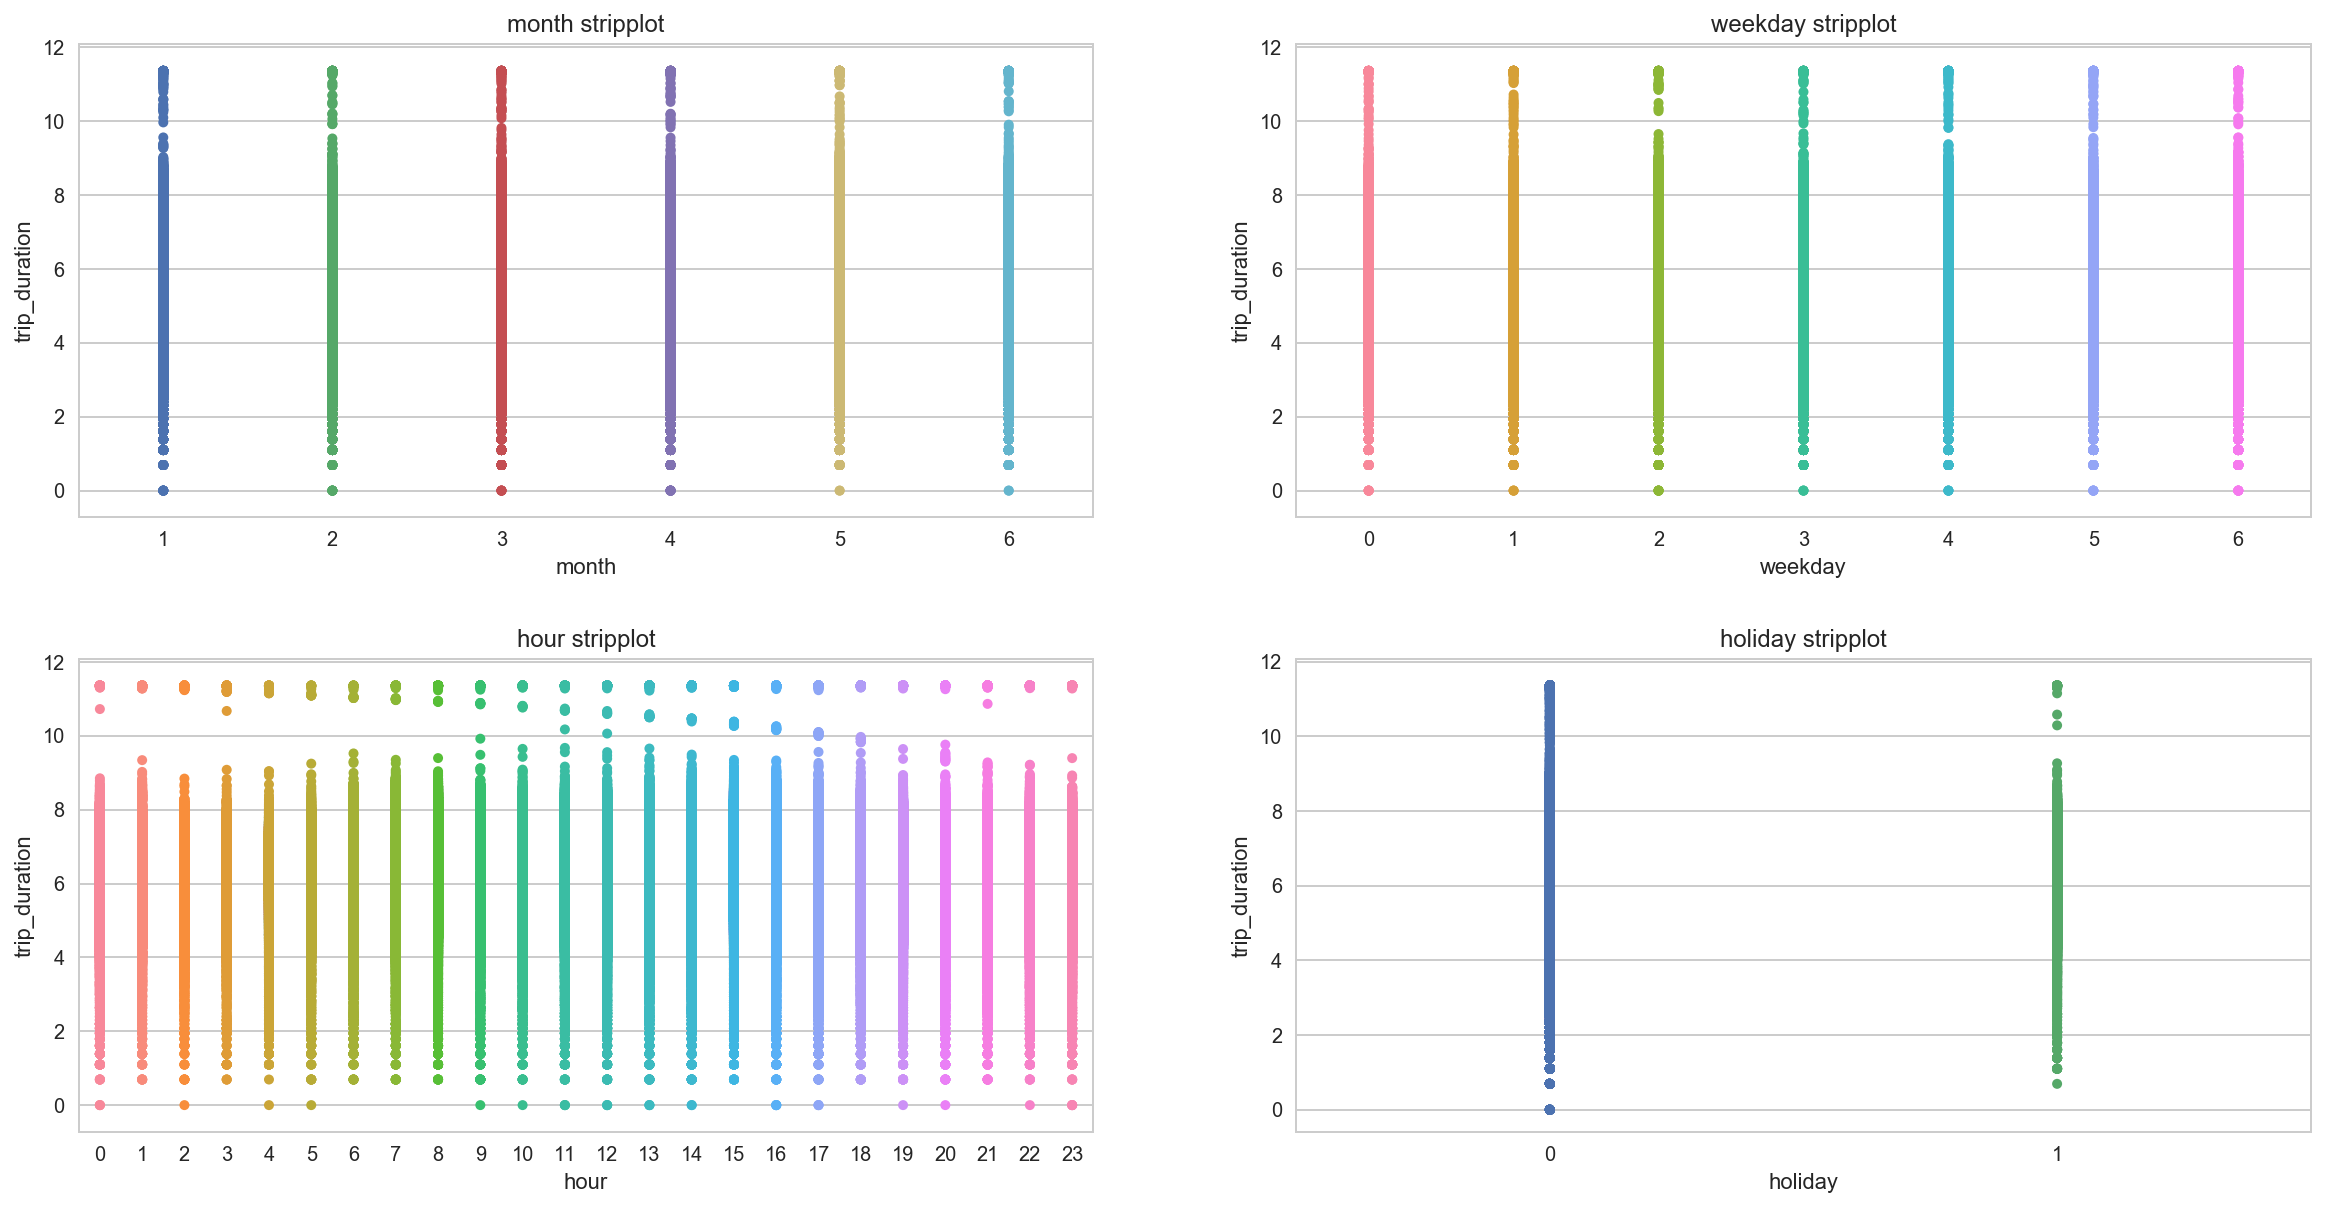

In [20]:
# feature stripplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2, 2, i-9)
    sns.stripplot(x = train[train.columns[i]], y = train['trip_duration'])
    plt.title('{} stripplot'.format(train.columns[i]))

---

### 4. Y data & X data(two features)

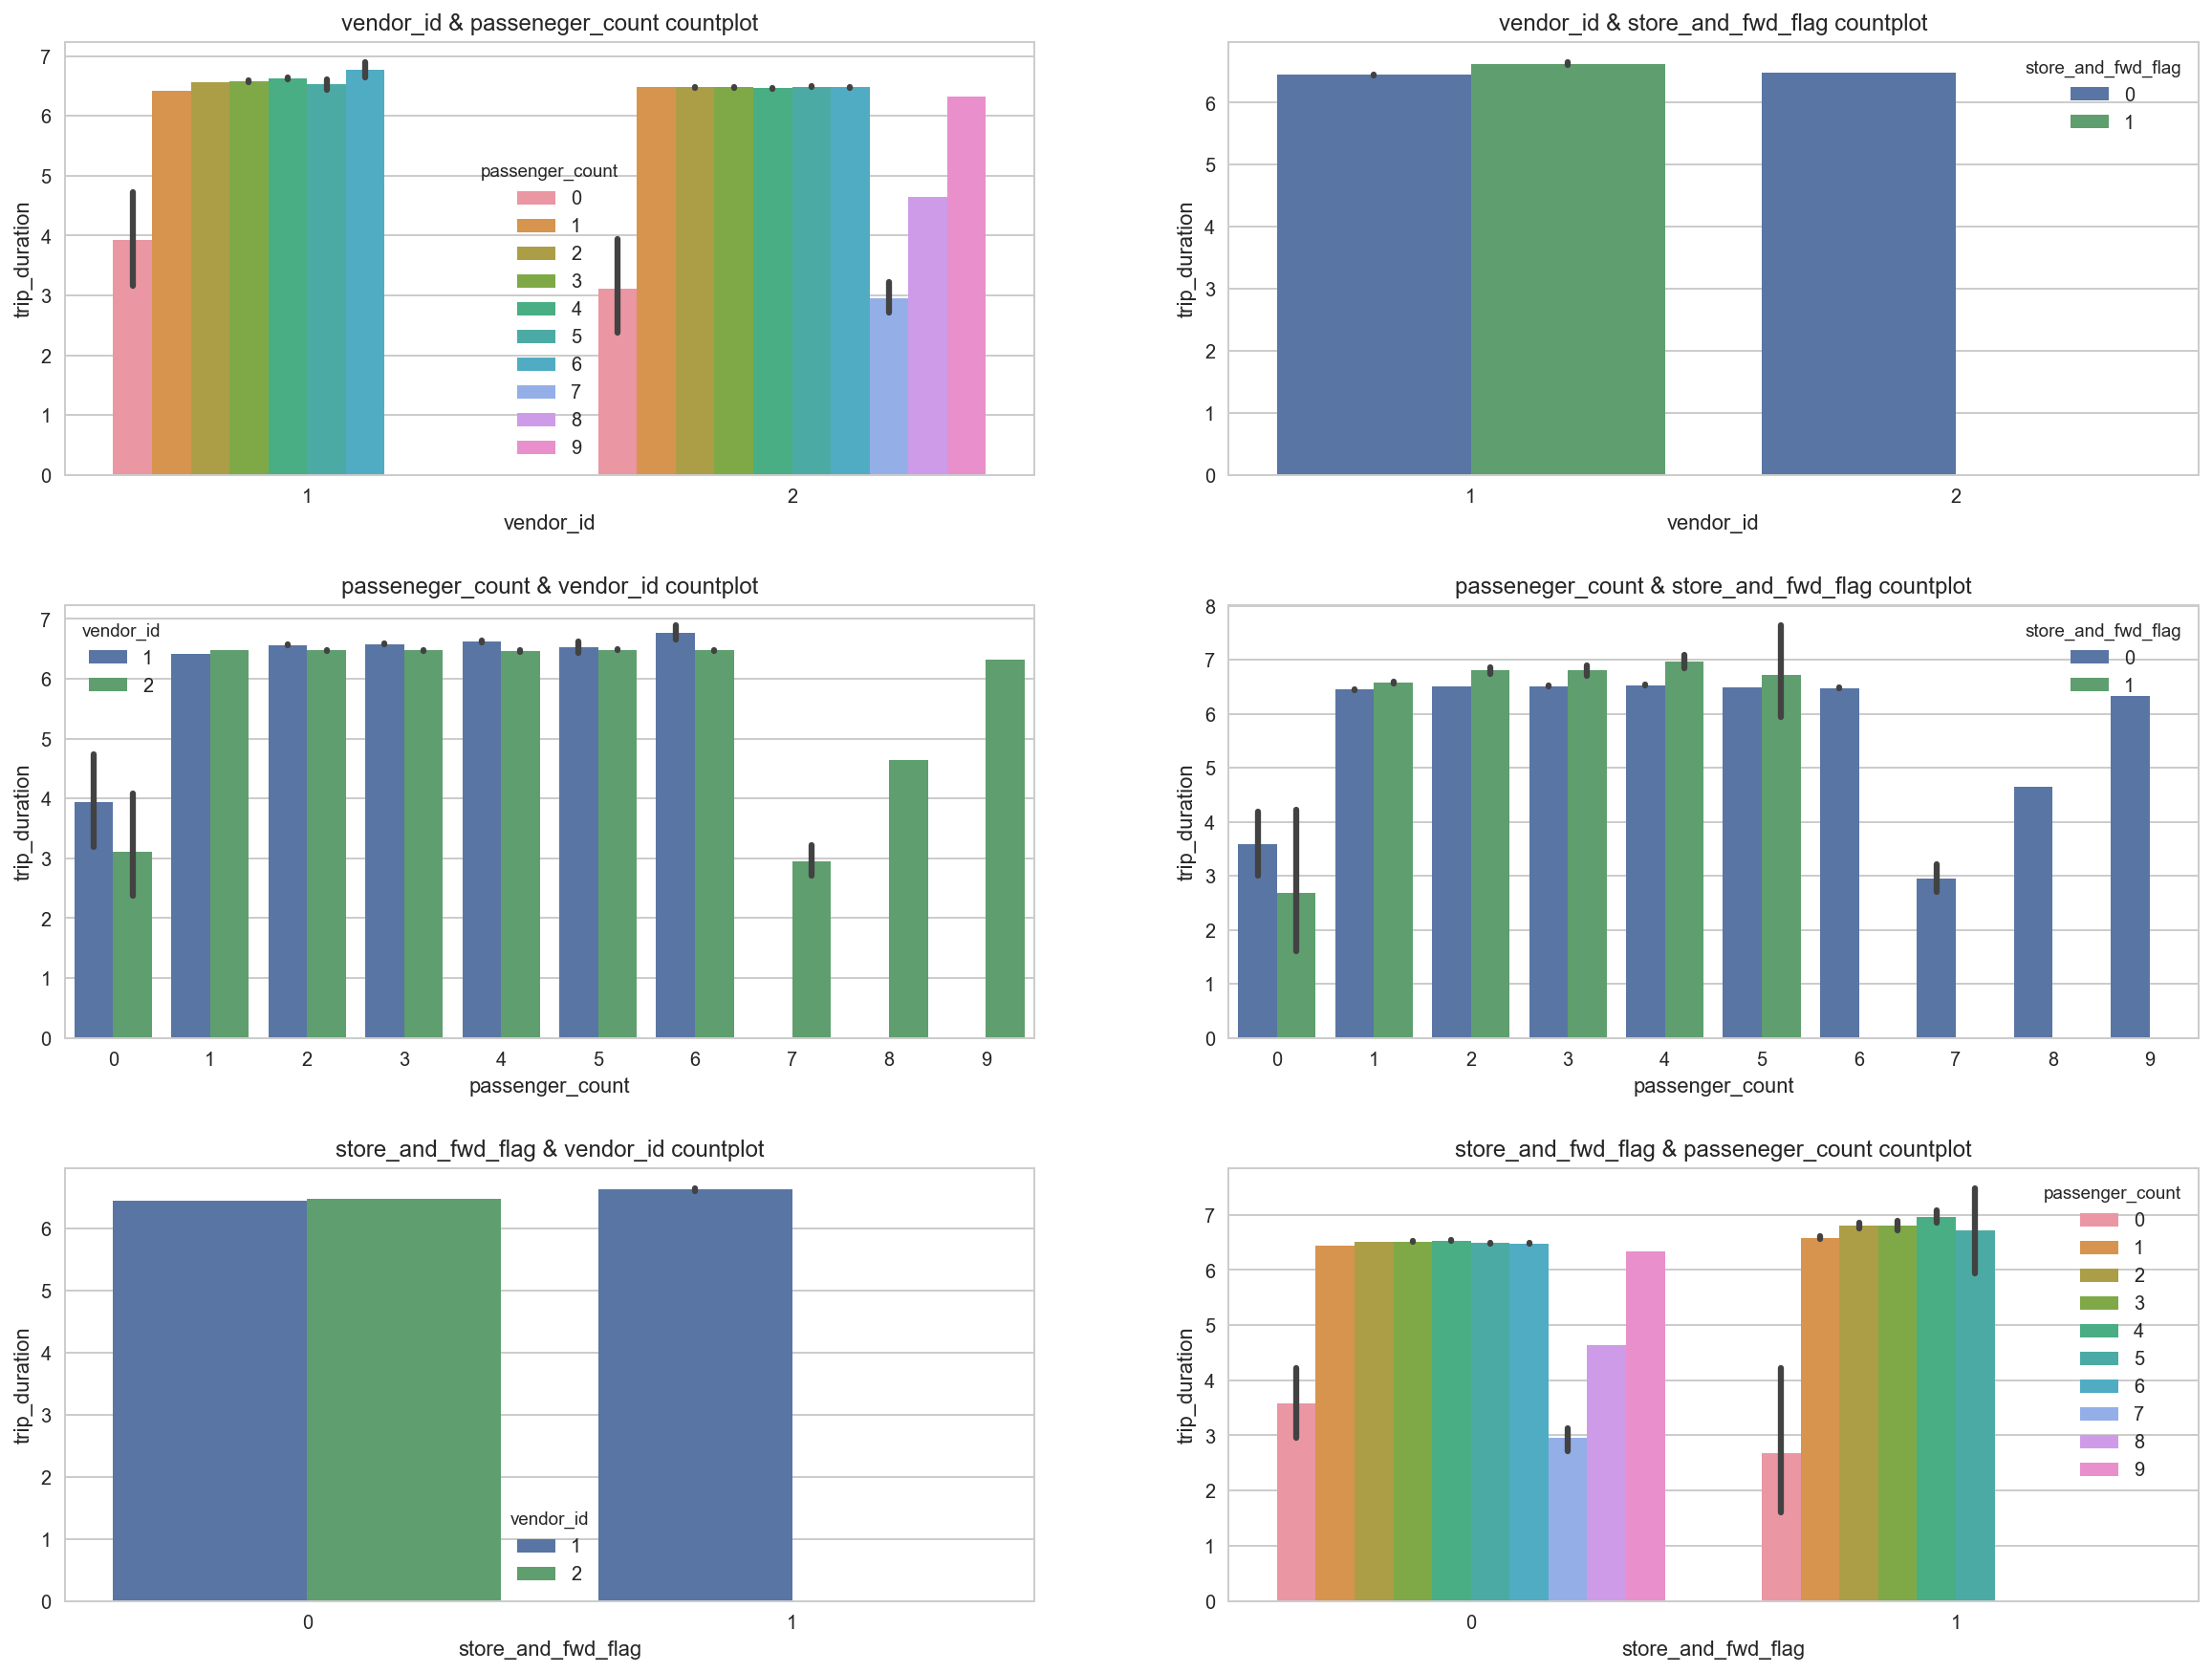

In [21]:
# detail countplot
plt.figure(figsize=(20, 15))
subplots_adjust(hspace = 0.3)

plt.subplot(3, 2, 1)
sns.barplot(x = 'vendor_id', y = 'trip_duration', hue = 'passenger_count', data = train)
plt.title('vendor_id & passeneger_count countplot')

plt.subplot(3, 2, 2)
sns.barplot(x = 'vendor_id', y = 'trip_duration', hue = 'store_and_fwd_flag', data = train)
plt.title('vendor_id & store_and_fwd_flag countplot')

plt.subplot(3, 2, 3)
sns.barplot(x = 'passenger_count', y = 'trip_duration', hue = 'vendor_id', data = train)
plt.title('passeneger_count & vendor_id countplot')

plt.subplot(3, 2, 4)
sns.barplot(x = 'passenger_count', y = 'trip_duration', hue = 'store_and_fwd_flag', data = train)
plt.title('passeneger_count & store_and_fwd_flag countplot')

plt.subplot(3, 2, 5)
sns.barplot(x = 'store_and_fwd_flag', y = 'trip_duration', hue = 'vendor_id', data = train)
plt.title('store_and_fwd_flag & vendor_id countplot')

plt.subplot(3, 2, 6)
sns.barplot(x = 'store_and_fwd_flag', y = 'trip_duration', hue = 'passenger_count', data = train)
plt.title('store_and_fwd_flag & passeneger_count countplot')

plt.show()

---

### 5. Groupby (pandas)

In [22]:
# Groupby vendor_id (mean)
train.groupby('vendor_id').mean()

,passenger_count,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,weekday,hour,holiday
vendor_id,,,,,,,,,,,
1,1.259402,0.01186,-73.974082,40.750860,-73.973532,40.751626,6.447464,3.528045,3.047627,13.542666,0.024196
2,2.016720,0.00000,-73.972969,40.750974,-73.973315,40.751950,6.479308,3.507068,3.052764,13.661968,0.025562


In [23]:
# Groupby passenger_count (mean)
train.groupby('passenger_count').mean()

,vendor_id,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,weekday,hour,holiday
passenger_count,,,,,,,,,,,
0,1.483333,0.050000,-73.957256,40.736596,-73.963539,40.735779,3.537637,3.066667,3.550000,11.533333,0.050000
1,1.467088,0.006222,-73.973551,40.751209,-73.973371,40.751977,6.447493,3.514533,2.996906,13.505743,0.024166
2,1.561895,0.005520,-73.973343,40.749811,-73.973464,40.751070,6.514310,3.532995,3.203792,13.999753,0.027501
3,1.616969,0.004391,-73.974312,40.750224,-73.974016,40.751601,6.515151,3.556465,3.244223,13.912615,0.027531
4,1.579496,0.006443,-73.973836,40.749328,-73.974422,40.750786,6.531112,3.534467,3.315449,13.981481,0.029820
5,1.995595,0.000051,-73.972432,40.750801,-73.973206,40.751590,6.486719,3.480752,3.086531,13.638856,0.024396
6,1.996855,0.000000,-73.973227,40.751611,-73.973192,40.752375,6.477468,3.494672,3.071028,13.400203,0.024704
7,2.000000,0.000000,-73.948100,40.740285,-73.948097,40.740289,2.957122,5.000000,4.000000,17.000000,0.000000
8,2.000000,0.000000,-73.992653,40.768719,-74.041374,40.729954,4.644391,1.000000,4.000000,1.000000,1.000000


In [24]:
# Groupby store_and_fwd_flag(mean)
train.groupby('store_and_fwd_flag').mean()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,weekday,hour,holiday
store_and_fwd_flag,,,,,,,,,,,
0,1.537919,1.666666,-73.973544,40.750941,-73.973459,40.751826,6.463595,3.516773,3.050950,13.605417,0.024917
1,1.000000,1.279553,-73.963205,40.747290,-73.965613,40.747068,6.627378,3.525917,2.946675,13.799378,0.026600


---

### 6. Correlation

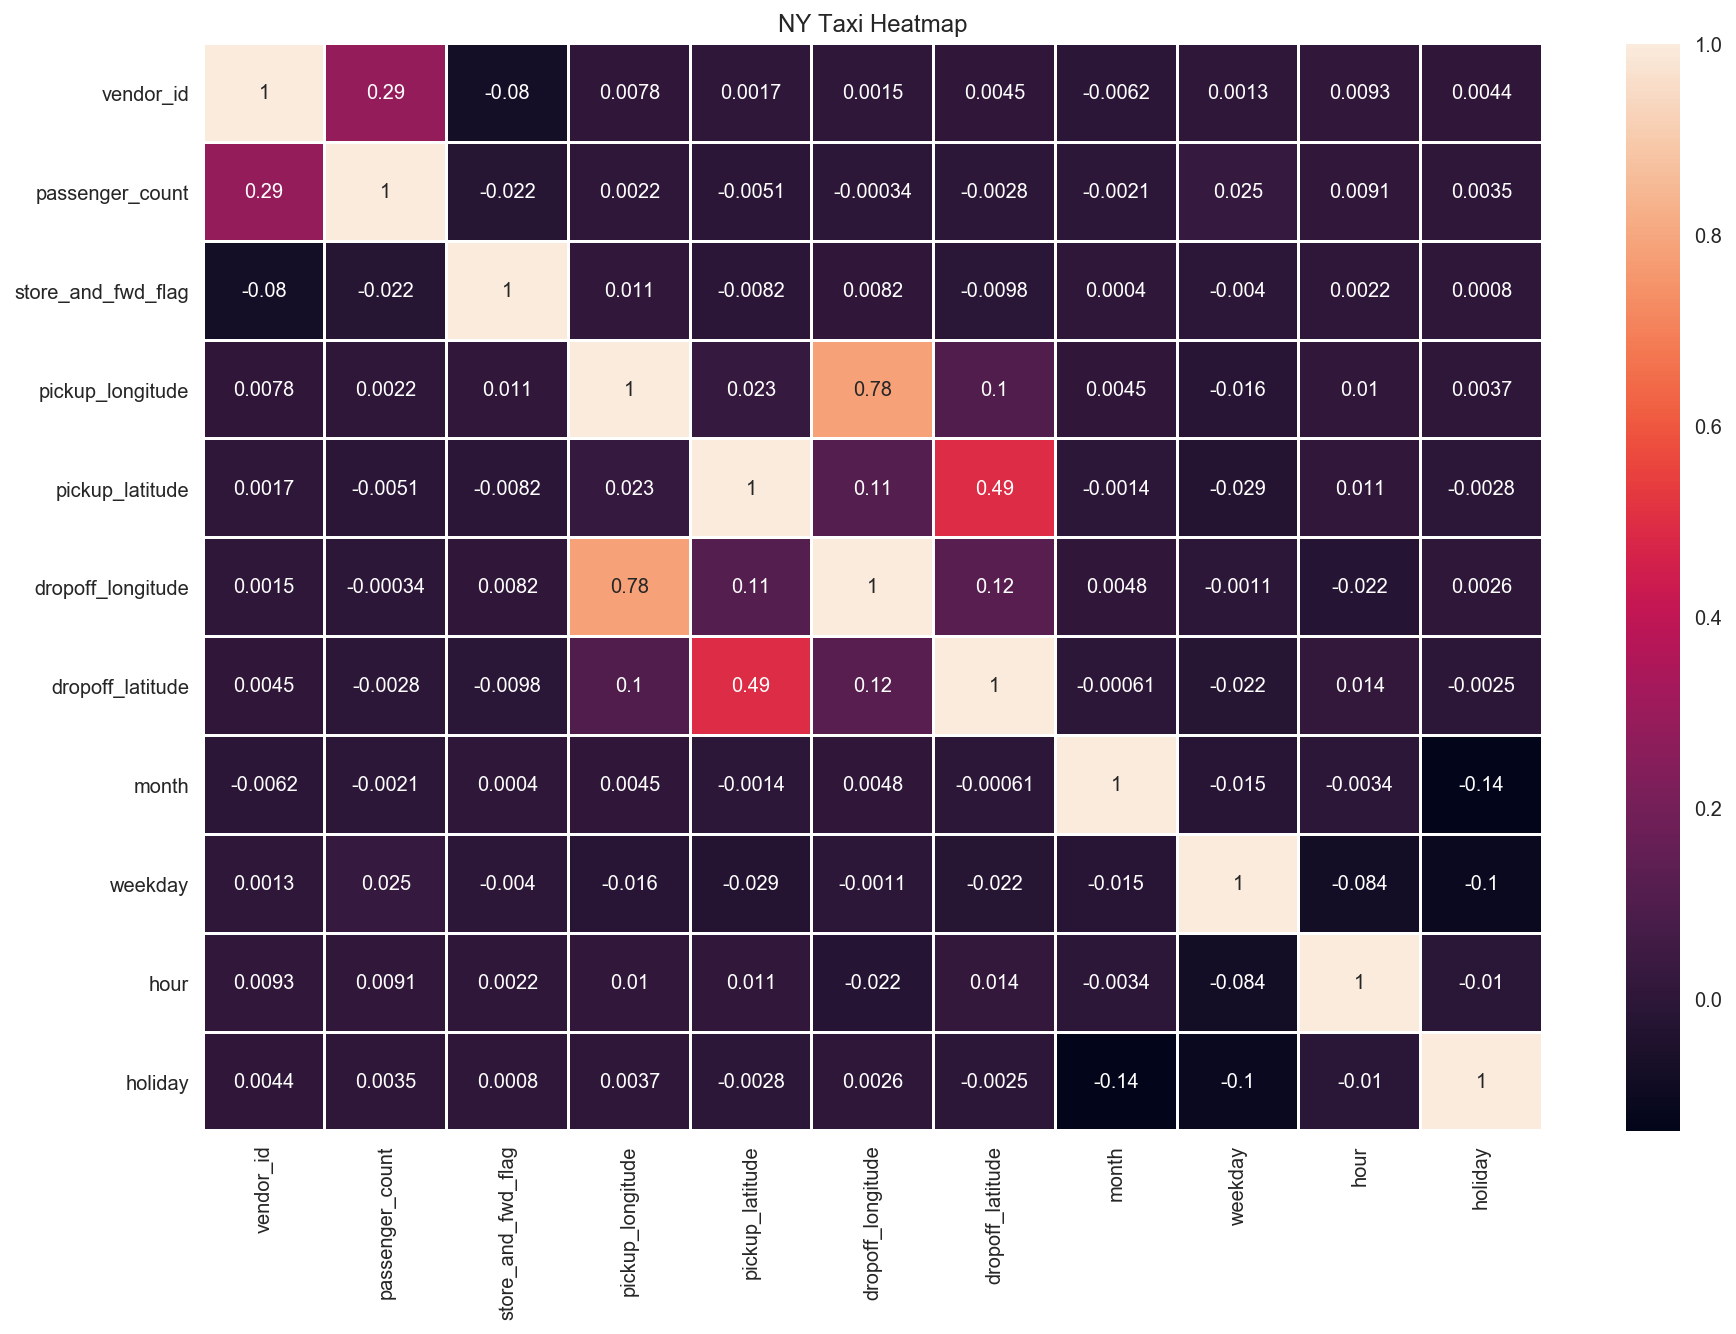

In [25]:
# correlation
correlation = train.drop(['trip_duration'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('NY Taxi Heatmap')
plt.show()